# ANALISA PERBEDAAN ANALISIS SENTIMEN SECARA MANUAL DENGAN MENGGUNAKAN LIBRARY TEXTBLOB TERHADAP KATA VAKSIN DENGAN DATA TWEETS BAHASA INGGRIS


### Pengambilan data

In [ ]:
import pandas as pd

!pip install snscrape 
import snscrape.modules.twitter as sntwitter 
import itertools 

import numpy as np
import csv

In [ ]:
#cukup jalankan satu kali
#mengambil data dengan kata vaccine
df = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
   'vaccine').get_items(), 100))[['date', 'content']]
   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_vaccine11aprdatecontent.csv')

In [ ]:
df.head(10)

,date,content
0,2022-04-11 15:29:55+00:00,"2/ Production has slowed, further research ha..."
1,2022-04-11 15:29:55+00:00,"SVP, je suis un vieux boomer mais je ne regard..."
2,2022-04-11 15:29:54+00:00,Canadian Dr. Given Psychiatric Detention for H...
3,2022-04-11 15:29:53+00:00,@IppokratisAnge1 Vaccines reduce your likeliho...
4,2022-04-11 15:29:53+00:00,@koenig_lydie @jeangarr78 l'OTAN est géré par ...
5,2022-04-11 15:29:53+00:00,@SuSpenceG @Lard_Baron @JDrewsyBC The previous...
6,2022-04-11 15:29:53+00:00,"@k_b_lvi Again, so show the data used to deter..."
7,2022-04-11 15:29:52+00:00,@Nkosi_Shebi 3452839
8,2022-04-11 15:29:51+00:00,"@oakaged22 @aflink27 @RyanAFournier Oh, so she..."
9,2022-04-11 15:29:51+00:00,I seriously think they should be checking into...


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset_vaccine11aprdatecontent.csv', index=None)

In [ ]:
df = df.drop(columns=['date']) 

In [ ]:
df

,content
0,"2/ Production has slowed, further research ha..."
1,"SVP, je suis un vieux boomer mais je ne regard..."
2,Canadian Dr. Given Psychiatric Detention for H...
3,@IppokratisAnge1 Vaccines reduce your likeliho...
4,@koenig_lydie @jeangarr78 l'OTAN est géré par ...
...,...
95,@andrew7rd @globalism_no @Hansy_Democrat @wake...
96,@Tuliodna No vaccines for under 5 still. 😫
97,@apsmunro Comprehensive investigations reveale...
98,@Sites4Congress @loveis716 You’re right. He’s ...


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset_vaccine11aprcontent.csv', index=None)

### Pembersihan data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_vaccine11aprcontent.csv')

In [ ]:
df

,content
0,"2/ Production has slowed, further research ha..."
1,"SVP, je suis un vieux boomer mais je ne regard..."
2,Canadian Dr. Given Psychiatric Detention for H...
3,@IppokratisAnge1 Vaccines reduce your likeliho...
4,@koenig_lydie @jeangarr78 l'OTAN est géré par ...
...,...
95,@andrew7rd @globalism_no @Hansy_Democrat @wake...
96,@Tuliodna No vaccines for under 5 still. 😫
97,@apsmunro Comprehensive investigations reveale...
98,@Sites4Congress @loveis716 You’re right. He’s ...


clean 1 pembersihan spesial karakter, tag @ dan angka

In [ ]:

import re 
import string 

def clean_text(tweet):
    tweet = tweet.lower() 
    tweet = re.sub('@[^\s]+', '', tweet) 
    tweet = re.sub('\[.*?\]', '', tweet) 
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', tweet) 
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet) 
    tweet = re.sub('\w*\d\w*', '', tweet) 
    tweet = re.sub('[‘’“”…]', '', tweet) 
    tweet = re.sub('\n', '', tweet) 
    return tweet

    
tweet = lambda x: clean_text(x) 

In [ ]:
df['clean1'] = pd.DataFrame(df.content.apply(tweet))
df

,content,clean1
0,"2/ Production has slowed, further research ha...",production has slowed further research has s...
1,"SVP, je suis un vieux boomer mais je ne regard...",svp je suis un vieux boomer mais je ne regarde...
2,Canadian Dr. Given Psychiatric Detention for H...,canadian dr given psychiatric detention for hi...
3,@IppokratisAnge1 Vaccines reduce your likeliho...,vaccines reduce your likelihood of needing ho...
4,@koenig_lydie @jeangarr78 l'OTAN est géré par ...,lotan est géré par les etats unison peut mie...
...,...,...
95,@andrew7rd @globalism_no @Hansy_Democrat @wake...,youre right its not and i didnt say i...
96,@Tuliodna No vaccines for under 5 still. 😫,no vaccines for under still 😫
97,@apsmunro Comprehensive investigations reveale...,comprehensive investigations revealed consist...
98,@Sites4Congress @loveis716 You’re right. He’s ...,youre right hes caved to the maga base more ...


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset_vaccine11aprclean1.csv', index=None)

clean 2 stopwords penghapusan kata seperti are, the, girl

In [ ]:
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
additional  = ['rt','rts','retweet'] 
swords = set().union(stopwords.words('english'), additional) 

df['clean2'] = (df['clean1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (swords)]))) 
df

,content,clean1,clean2
0,"2/ Production has slowed, further research ha...",production has slowed further research has s...,production slowed research stalled visit world...
1,"SVP, je suis un vieux boomer mais je ne regard...",svp je suis un vieux boomer mais je ne regarde...,svp je suis un vieux boomer mais je ne regarde...
2,Canadian Dr. Given Psychiatric Detention for H...,canadian dr given psychiatric detention for hi...,canadian dr given psychiatric detention highli...
3,@IppokratisAnge1 Vaccines reduce your likeliho...,vaccines reduce your likelihood of needing ho...,vaccines reduce likelihood needing hospitaliza...
4,@koenig_lydie @jeangarr78 l'OTAN est géré par ...,lotan est géré par les etats unison peut mie...,lotan est géré par les etats unison peut mieux...
...,...,...,...
95,@andrew7rd @globalism_no @Hansy_Democrat @wake...,youre right its not and i didnt say i...,youre right didnt say contracted something vac...
96,@Tuliodna No vaccines for under 5 still. 😫,no vaccines for under still 😫,vaccines still 😫
97,@apsmunro Comprehensive investigations reveale...,comprehensive investigations revealed consist...,comprehensive investigations revealed consiste...
98,@Sites4Congress @loveis716 You’re right. He’s ...,youre right hes caved to the maga base more ...,youre right hes caved maga base covid policy a...


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset_vaccine11aprclean2.csv', index=None)

clean 3 stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['clean3']=df['clean2'].apply(simple_stemmer)

In [ ]:
df

,content,clean1,clean2,clean3
0,"2/ Production has slowed, further research ha...",production has slowed further research has s...,production slowed research stalled visit world...,product slow research stall visit world health...
1,"SVP, je suis un vieux boomer mais je ne regard...",svp je suis un vieux boomer mais je ne regarde...,svp je suis un vieux boomer mais je ne regarde...,svp je sui un vieux boomer mai je ne regard pa...
2,Canadian Dr. Given Psychiatric Detention for H...,canadian dr given psychiatric detention for hi...,canadian dr given psychiatric detention highli...,canadian dr given psychiatr detent highlight v...
3,@IppokratisAnge1 Vaccines reduce your likeliho...,vaccines reduce your likelihood of needing ho...,vaccines reduce likelihood needing hospitaliza...,vaccin reduc likelihood need hospit ventil get...
4,@koenig_lydie @jeangarr78 l'OTAN est géré par ...,lotan est géré par les etats unison peut mie...,lotan est géré par les etats unison peut mieux...,lotan est géré par le etat unison peut mieux f...
...,...,...,...,...
95,@andrew7rd @globalism_no @Hansy_Democrat @wake...,youre right its not and i didnt say i...,youre right didnt say contracted something vac...,your right didnt say contract someth vaccin me...
96,@Tuliodna No vaccines for under 5 still. 😫,no vaccines for under still 😫,vaccines still 😫,vaccin still 😫
97,@apsmunro Comprehensive investigations reveale...,comprehensive investigations revealed consist...,comprehensive investigations revealed consiste...,comprehens investig reveal consist pathophysio...
98,@Sites4Congress @loveis716 You’re right. He’s ...,youre right hes caved to the maga base more ...,youre right hes caved maga base covid policy a...,your right he cave maga base covid polici actu...


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset_vaccine11aprclean3.csv', index=None)

membuat tokenize kolom tokens dari kolom clean3

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['tokens'] = pd.DataFrame(df['clean3'].apply(nltk.word_tokenize))
df

,content,clean1,clean2,clean3,tokens
0,"2/ Production has slowed, further research ha...",production has slowed further research has s...,production slowed research stalled visit world...,product slow research stall visit world health...,"[product, slow, research, stall, visit, world,..."
1,"SVP, je suis un vieux boomer mais je ne regard...",svp je suis un vieux boomer mais je ne regarde...,svp je suis un vieux boomer mais je ne regarde...,svp je sui un vieux boomer mai je ne regard pa...,"[svp, je, sui, un, vieux, boomer, mai, je, ne,..."
2,Canadian Dr. Given Psychiatric Detention for H...,canadian dr given psychiatric detention for hi...,canadian dr given psychiatric detention highli...,canadian dr given psychiatr detent highlight v...,"[canadian, dr, given, psychiatr, detent, highl..."
3,@IppokratisAnge1 Vaccines reduce your likeliho...,vaccines reduce your likelihood of needing ho...,vaccines reduce likelihood needing hospitaliza...,vaccin reduc likelihood need hospit ventil get...,"[vaccin, reduc, likelihood, need, hospit, vent..."
4,@koenig_lydie @jeangarr78 l'OTAN est géré par ...,lotan est géré par les etats unison peut mie...,lotan est géré par les etats unison peut mieux...,lotan est géré par le etat unison peut mieux f...,"[lotan, est, géré, par, le, etat, unison, peut..."
...,...,...,...,...,...
95,@andrew7rd @globalism_no @Hansy_Democrat @wake...,youre right its not and i didnt say i...,youre right didnt say contracted something vac...,your right didnt say contract someth vaccin me...,"[your, right, didnt, say, contract, someth, va..."
96,@Tuliodna No vaccines for under 5 still. 😫,no vaccines for under still 😫,vaccines still 😫,vaccin still 😫,"[vaccin, still, 😫]"
97,@apsmunro Comprehensive investigations reveale...,comprehensive investigations revealed consist...,comprehensive investigations revealed consiste...,comprehens investig reveal consist pathophysio...,"[comprehens, investig, reveal, consist, pathop..."
98,@Sites4Congress @loveis716 You’re right. He’s ...,youre right hes caved to the maga base more ...,youre right hes caved maga base covid policy a...,your right he cave maga base covid polici actu...,"[your, right, he, cave, maga, base, covid, pol..."


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset_vaccine11aprtokens.csv', index=None)

### Melabel sentimen secara manual 

In [ ]:
# berikan label secara manual terlebih dahulu
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_vaccine11aprsentimanual.csv')

In [ ]:
df

,content,clean1,clean2,clean3,tokens,sentimen_manual
0,"2/ Production has slowed, further research ha...",production has slowed further research has s...,production slowed research stalled visit world...,product slow research stall visit world health...,"['product', 'slow', 'research', 'stall', 'visi...",netral
1,"SVP, je suis un vieux boomer mais je ne regard...",svp je suis un vieux boomer mais je ne regarde...,svp je suis un vieux boomer mais je ne regarde...,svp je sui un vieux boomer mai je ne regard pa...,"['svp', 'je', 'sui', 'un', 'vieux', 'boomer', ...",netral
2,Canadian Dr. Given Psychiatric Detention for H...,canadian dr given psychiatric detention for hi...,canadian dr given psychiatric detention highli...,canadian dr given psychiatr detent highlight v...,"['canadian', 'dr', 'given', 'psychiatr', 'dete...",netral
3,@IppokratisAnge1 Vaccines reduce your likeliho...,vaccines reduce your likelihood of needing ho...,vaccines reduce likelihood needing hospitaliza...,vaccin reduc likelihood need hospit ventil get...,"['vaccin', 'reduc', 'likelihood', 'need', 'hos...",netral
4,@koenig_lydie @jeangarr78 l'OTAN est géré par ...,lotan est géré par les etats unison peut mie...,lotan est géré par les etats unison peut mieux...,lotan est géré par le etat unison peut mieux f...,"['lotan', 'est', 'géré', 'par', 'le', 'etat', ...",netral
...,...,...,...,...,...,...
95,@andrew7rd @globalism_no @Hansy_Democrat @wake...,youre right its not and i didnt say i...,youre right didnt say contracted something vac...,your right didnt say contract someth vaccin me...,"['your', 'right', 'didnt', 'say', 'contract', ...",negatif
96,@Tuliodna No vaccines for under 5 still. 😫,no vaccines for under still 😫,vaccines still 😫,vaccin still 😫,"['vaccin', 'still', '😫']",negatif
97,@apsmunro Comprehensive investigations reveale...,comprehensive investigations revealed consist...,comprehensive investigations revealed consiste...,comprehens investig reveal consist pathophysio...,"['comprehens', 'investig', 'reveal', 'consist'...",negatif
98,@Sites4Congress @loveis716 You’re right. He’s ...,youre right hes caved to the maga base more ...,youre right hes caved maga base covid policy a...,your right he cave maga base covid polici actu...,"['your', 'right', 'he', 'cave', 'maga', 'base'...",negatif


In [ ]:
df['sentimen_manual'].value_counts() 

negatif    37
netral     36
positif    27
Name: sentimen_manual, dtype: int64

### Melabel otomatis menggunakan library Textblob

In [ ]:
from textblob import TextBlob

In [ ]:
df['tokens'] = df['tokens'].astype('str')
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['polarity'] = df['tokens'].apply(get_polarity)

In [ ]:
df

,content,clean1,clean2,clean3,tokens,sentimen_manual,polarity
0,"2/ Production has slowed, further research ha...",production has slowed further research has s...,production slowed research stalled visit world...,product slow research stall visit world health...,"['product', 'slow', 'research', 'stall', 'visi...",netral,-0.150000
1,"SVP, je suis un vieux boomer mais je ne regard...",svp je suis un vieux boomer mais je ne regarde...,svp je suis un vieux boomer mais je ne regarde...,svp je sui un vieux boomer mai je ne regard pa...,"['svp', 'je', 'sui', 'un', 'vieux', 'boomer', ...",netral,0.000000
2,Canadian Dr. Given Psychiatric Detention for H...,canadian dr given psychiatric detention for hi...,canadian dr given psychiatric detention highli...,canadian dr given psychiatr detent highlight v...,"['canadian', 'dr', 'given', 'psychiatr', 'dete...",netral,0.000000
3,@IppokratisAnge1 Vaccines reduce your likeliho...,vaccines reduce your likelihood of needing ho...,vaccines reduce likelihood needing hospitaliza...,vaccin reduc likelihood need hospit ventil get...,"['vaccin', 'reduc', 'likelihood', 'need', 'hos...",netral,-0.714286
4,@koenig_lydie @jeangarr78 l'OTAN est géré par ...,lotan est géré par les etats unison peut mie...,lotan est géré par les etats unison peut mieux...,lotan est géré par le etat unison peut mieux f...,"['lotan', 'est', 'géré', 'par', 'le', 'etat', ...",netral,0.700000
...,...,...,...,...,...,...,...
95,@andrew7rd @globalism_no @Hansy_Democrat @wake...,youre right its not and i didnt say i...,youre right didnt say contracted something vac...,your right didnt say contract someth vaccin me...,"['your', 'right', 'didnt', 'say', 'contract', ...",negatif,-0.098214
96,@Tuliodna No vaccines for under 5 still. 😫,no vaccines for under still 😫,vaccines still 😫,vaccin still 😫,"['vaccin', 'still', '😫']",negatif,0.000000
97,@apsmunro Comprehensive investigations reveale...,comprehensive investigations revealed consist...,comprehensive investigations revealed consiste...,comprehens investig reveal consist pathophysio...,"['comprehens', 'investig', 'reveal', 'consist'...",negatif,0.000000
98,@Sites4Congress @loveis716 You’re right. He’s ...,youre right hes caved to the maga base more ...,youre right hes caved maga base covid policy a...,your right he cave maga base covid polici actu...,"['your', 'right', 'he', 'cave', 'maga', 'base'...",negatif,0.027143


In [ ]:
df['sentimen_textblob']=''
df.loc[df.polarity>0,'sentimen_textblob']='positif'
df.loc[df.polarity==0,'sentimen_textblob']='netral'
df.loc[df.polarity<0,'sentimen_textblob']='negatif' 

In [ ]:
df

,content,clean1,clean2,clean3,tokens,sentimen_manual,polarity,sentimen_textblob
0,"2/ Production has slowed, further research ha...",production has slowed further research has s...,production slowed research stalled visit world...,product slow research stall visit world health...,"['product', 'slow', 'research', 'stall', 'visi...",netral,-0.150000,negatif
1,"SVP, je suis un vieux boomer mais je ne regard...",svp je suis un vieux boomer mais je ne regarde...,svp je suis un vieux boomer mais je ne regarde...,svp je sui un vieux boomer mai je ne regard pa...,"['svp', 'je', 'sui', 'un', 'vieux', 'boomer', ...",netral,0.000000,netral
2,Canadian Dr. Given Psychiatric Detention for H...,canadian dr given psychiatric detention for hi...,canadian dr given psychiatric detention highli...,canadian dr given psychiatr detent highlight v...,"['canadian', 'dr', 'given', 'psychiatr', 'dete...",netral,0.000000,netral
3,@IppokratisAnge1 Vaccines reduce your likeliho...,vaccines reduce your likelihood of needing ho...,vaccines reduce likelihood needing hospitaliza...,vaccin reduc likelihood need hospit ventil get...,"['vaccin', 'reduc', 'likelihood', 'need', 'hos...",netral,-0.714286,negatif
4,@koenig_lydie @jeangarr78 l'OTAN est géré par ...,lotan est géré par les etats unison peut mie...,lotan est géré par les etats unison peut mieux...,lotan est géré par le etat unison peut mieux f...,"['lotan', 'est', 'géré', 'par', 'le', 'etat', ...",netral,0.700000,positif
...,...,...,...,...,...,...,...,...
95,@andrew7rd @globalism_no @Hansy_Democrat @wake...,youre right its not and i didnt say i...,youre right didnt say contracted something vac...,your right didnt say contract someth vaccin me...,"['your', 'right', 'didnt', 'say', 'contract', ...",negatif,-0.098214,negatif
96,@Tuliodna No vaccines for under 5 still. 😫,no vaccines for under still 😫,vaccines still 😫,vaccin still 😫,"['vaccin', 'still', '😫']",negatif,0.000000,netral
97,@apsmunro Comprehensive investigations reveale...,comprehensive investigations revealed consist...,comprehensive investigations revealed consiste...,comprehens investig reveal consist pathophysio...,"['comprehens', 'investig', 'reveal', 'consist'...",negatif,0.000000,netral
98,@Sites4Congress @loveis716 You’re right. He’s ...,youre right hes caved to the maga base more ...,youre right hes caved maga base covid policy a...,your right he cave maga base covid polici actu...,"['your', 'right', 'he', 'cave', 'maga', 'base'...",negatif,0.027143,positif


In [ ]:
df['sentimen_textblob'].value_counts() 

netral     46
positif    37
negatif    17
Name: sentimen_textblob, dtype: int64

### Visualization 

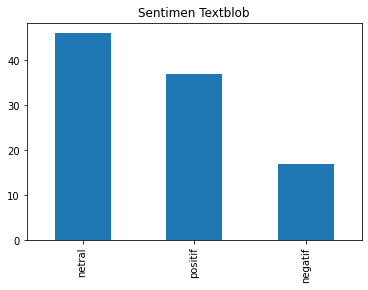

In [ ]:
df.sentimen_textblob.value_counts().plot(kind='bar',title="Sentimen Textblob") 

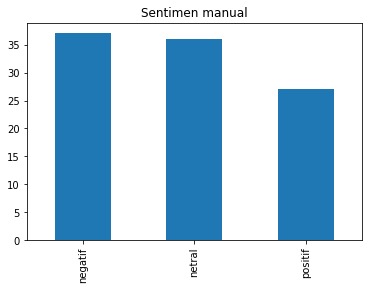

In [ ]:
df.sentimen_manual.value_counts().plot(kind='bar',title="Sentimen manual") 